In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
# see all the csv files in the directory
import os
files = os.listdir("company")


In [46]:
required_file = files[19]
required_file

'JSLBB.csv'

In [47]:
df = pd.read_csv(f'company/{required_file}')

In [48]:
df.head()

,SN,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,1,2023/12/24,904.00,-1.63,919.50,897.20,901.60,946,"854,929.80"
1,2,2023/12/21,919.00,-2.03,922.00,867.30,920.00,"1,458","1,303,706.40"
2,3,2023/12/20,938.00,0.32,950.00,920.00,935.00,"1,312","1,230,796.50"
3,4,2023/12/19,935.00,5.29,935.00,900.00,900.00,"1,866","1,708,422.50"
4,5,2023/12/17,825.00,-1.94,839.90,825.00,825.00,"1,031","854,822.00"


In [49]:
# remove the comlun with name
df = df.drop(['SN'], axis=1)




In [50]:
# check the data type
df.dtypes

Date         object
LTP          object
%change     float64
High         object
Low          object
Open         object
Qty.         object
Turnover     object
dtype: object

In [51]:
# make the qty and turnover to float
df['Qty.'] = df['Qty.'].replace(',','', regex=True).astype(float)
df['Turnover'] = df['Turnover'].replace(',','', regex=True).astype(float)
df['LTP'] = df['LTP'].replace(',','', regex=True).astype(float)
df['Open'] = df['Open'].replace(',','', regex=True).astype(float)
df['High'] = df['High'].replace(',','', regex=True).astype(float)
df['Low'] = df['Low'].replace(',','', regex=True).astype(float)
df['Qty.'], df['Turnover']

(0        946.0
 1       1458.0
 2       1312.0
 3       1866.0
 4       1031.0
          ...  
 1561      30.0
 1562     440.0
 1563     190.0
 1564     100.0
 1565     590.0
 Name: Qty., Length: 1566, dtype: float64,
 0        854929.8
 1       1303706.4
 2       1230796.5
 3       1708422.5
 4        854822.0
           ...    
 1561      17040.0
 1562     237590.0
 1563      92670.0
 1564      45070.0
 1565     237510.0
 Name: Turnover, Length: 1566, dtype: float64)

In [52]:
df.dtypes

Date         object
LTP         float64
%change     float64
High        float64
Low         float64
Open        float64
Qty.        float64
Turnover    float64
dtype: object

In [53]:
df.head()

,Date,LTP,%change,High,Low,Open,Qty.,Turnover
0,2023/12/24,904.0,-1.63,919.5,897.2,901.6,946.0,854929.8
1,2023/12/21,919.0,-2.03,922.0,867.3,920.0,1458.0,1303706.4
2,2023/12/20,938.0,0.32,950.0,920.0,935.0,1312.0,1230796.5
3,2023/12/19,935.0,5.29,935.0,900.0,900.0,1866.0,1708422.5
4,2023/12/17,825.0,-1.94,839.9,825.0,825.0,1031.0,854822.0


In [54]:
df['Date'] = pd.to_datetime(df['Date'])

In [55]:
df['Date']

0      2023-12-24
1      2023-12-21
2      2023-12-20
3      2023-12-19
4      2023-12-17
          ...    
1561   2016-03-27
1562   2016-03-24
1563   2016-03-23
1564   2015-12-17
1565   2015-12-10
Name: Date, Length: 1566, dtype: datetime64[ns]

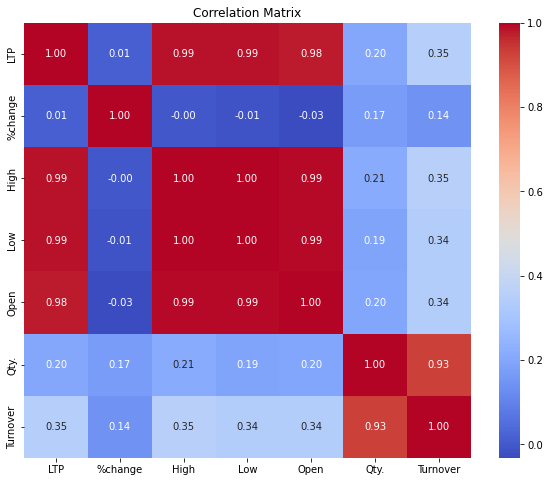

In [56]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

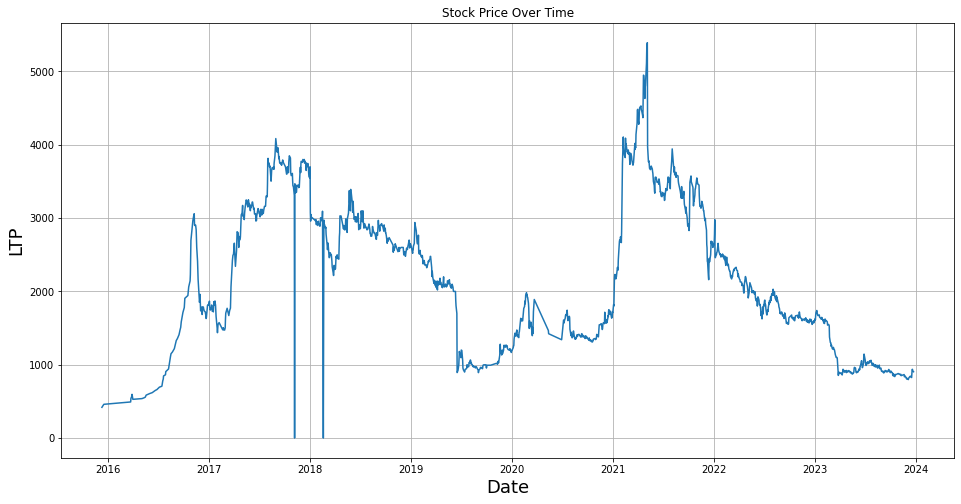

In [57]:
# Plotting "Date" against "LTP"-Last Trade Price
plt.figure(figsize=(16,8))
plt.title('Stock Price Over Time')
plt.xlabel('Date', fontsize=18)
plt.ylabel('LTP', fontsize=18)
plt.plot(df['Date'], df['LTP'])
# make grid lines
plt.grid(True)
plt.show()



In [58]:
df['%change']

0      -1.63
1      -2.03
2       0.32
3       5.29
4      -1.94
        ... 
1561    4.99
1562    9.96
1563    6.96
1564    9.79
1565    0.00
Name: %change, Length: 1566, dtype: float64

In [59]:
df['Month'] = df['Date'].dt.month

In [60]:
df.groupby('Month').mean()

,LTP,%change,High,Low,Open,Qty.,Turnover
Month,,,,,,,
1,2166.365217,0.433116,2176.681159,2108.825362,2142.143478,1911.971014,3.840769e+06
2,2412.618333,0.273917,2447.095000,2378.017500,2438.483333,2322.466667,7.057595e+06
3,2218.826613,0.368468,2252.833065,2182.170161,2217.152419,1445.008065,3.835289e+06
4,2469.354128,0.534679,2504.877064,2423.251376,2458.956881,1409.788991,5.670203e+06
5,2460.460800,0.002880,2498.433600,2420.214400,2459.584800,1355.544000,5.162650e+06
6,2250.557143,0.095952,2285.133333,2220.960317,2255.815873,864.650794,2.008202e+06
7,2057.817308,0.268269,2084.098077,2030.413462,2055.322436,845.621795,1.618316e+06
8,2130.608904,-0.061438,2138.027397,2078.050000,2109.172603,905.534247,2.232580e+06
9,2045.288462,0.073308,2071.476923,2020.179231,2045.165385,463.492308,1.011580e+06


In [61]:
monthly_change = df.groupby('Month').mean()['%change']
month_names = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun',
               7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
monthly_change.index = monthly_change.index.map(month_names)
monthly_change

Month
Jan    0.433116
Feb    0.273917
Mar    0.368468
Apr    0.534679
May    0.002880
Jun    0.095952
Jul    0.268269
Aug   -0.061438
Sep    0.073308
Oct    0.449223
Nov   -0.143382
Dec    0.167908
Name: %change, dtype: float64

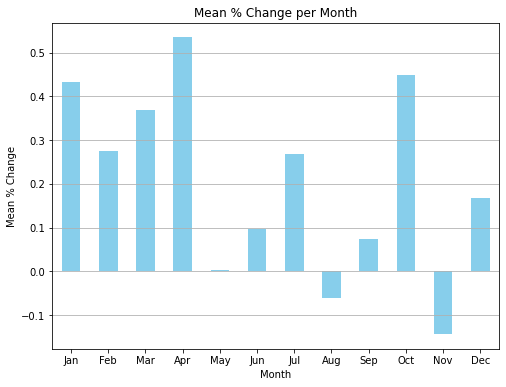

In [62]:
# Plotting month against the mean %change
plt.figure(figsize=(8, 6))
monthly_change.plot(kind='bar', color='skyblue')
plt.title('Mean % Change per Month')
plt.xlabel('Month')
plt.ylabel('Mean % Change')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


In [63]:
# Analyzing percentage change (%change)
df['Fluctuation'] = df['%change'].abs()  # Absolute value for fluctuations
threshold_fluctuation = 2.0  # Define your threshold for significant fluctuations
significant_fluctuations = df[df['Fluctuation'] > threshold_fluctuation]

In [64]:
df["Fluctuation"] = df['%change']
threshold_fluctuation = 2.0
significant_fluctuation = df[df['Fluctuation']> 2]
significant_fluctuations[['Date', '%change']]


,Date,%change
1,2023-12-21,-2.03
3,2023-12-19,5.29
22,2023-11-21,-3.58
24,2023-11-09,-2.18
33,2023-10-29,2.30
...,...,...
1560,2016-03-28,4.93
1561,2016-03-27,4.99
1562,2016-03-24,9.96
1563,2016-03-23,6.96


In [65]:
print("Periods of significant fluctuations:")
print(significant_fluctuations[['Date', 'Fluctuation']].head(20))

Periods of significant fluctuations:
         Date  Fluctuation
1  2023-12-21         2.03
3  2023-12-19         5.29
22 2023-11-21         3.58
24 2023-11-09         2.18
33 2023-10-29         2.30
35 2023-10-18         3.83
38 2023-10-12         3.75
39 2023-10-11         2.92
40 2023-10-10         2.51
45 2023-10-03         2.01
47 2023-10-01         3.14
55 2023-09-17         2.06
57 2023-09-12         2.05
59 2023-09-07         2.16
63 2023-08-30         2.62
65 2023-08-28         2.91
67 2023-08-23         3.52
68 2023-08-22         3.54
69 2023-08-21         2.23
70 2023-08-20         2.07


Maximum price:  5393.0
Minimum price:  0.0
Mean price:  2192.869667943806
Median price:  2061.0
Standard Deviation of price:  973.7379002629259
0    904.0
1    919.0
2    938.0
3    935.0
4    825.0
5    841.3
6    840.0
7    843.0
8    836.0
9    835.0
Name: LTP, dtype: float64


C:\Users\baral\AppData\Local\Temp\ipykernel_25432\2351986036.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LTP'], color='skyblue')


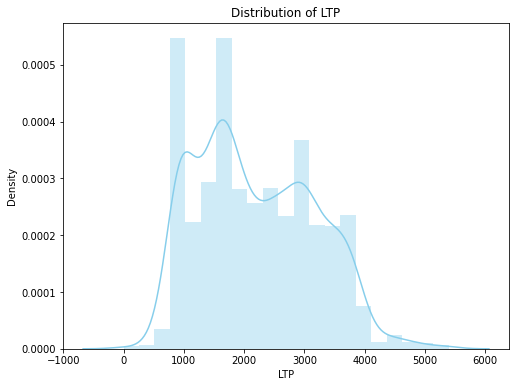

In [66]:
maximum_price = df['LTP'].max()
minimum_price = df['LTP'].min()
mean_price = df['LTP'].mean()
median_price = df['LTP'].median()
std_price = df['LTP'].std()

print("Maximum price: ", maximum_price)
print("Minimum price: ", minimum_price)
print("Mean price: ", mean_price)
print("Median price: ", median_price)
print("Standard Deviation of price: ", std_price)
print(df['LTP'].head(10))
# Plotting the distribution of the LTP
plt.figure(figsize=(8, 6))
sns.distplot(df['LTP'], color='skyblue')
plt.title('Distribution of LTP')
plt.xlabel('LTP')
plt.ylabel('Density')
plt.show()



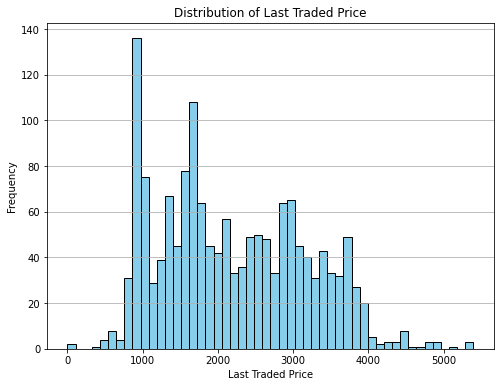

In [67]:
plt.figure(figsize=(8, 6))
plt.hist(df['LTP'], bins=50, color='skyblue', edgecolor='black')
plt.title('Distribution of Last Traded Price')
plt.xlabel('Last Traded Price')
plt.ylabel('Frequency')
plt.grid(axis='y')
plt.show()


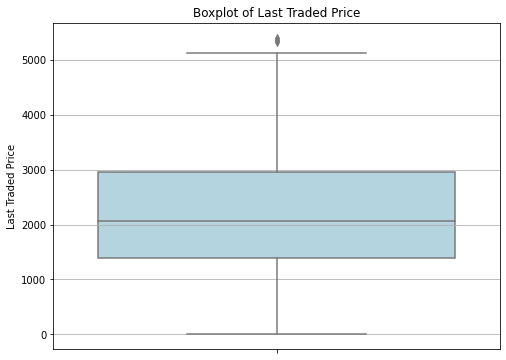

In [68]:
import seaborn as sns

# Plotting a boxplot to visualize the distribution and outliers of 'LTP' (Last Traded Price)
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['LTP'], color='lightblue')
plt.title('Boxplot of Last Traded Price')
plt.ylabel('Last Traded Price')
plt.grid(axis='y')
plt.show()


In [69]:
from statsmodels.tsa.arima.model import ARIMA
reverse_ltp = df['LTP'].iloc[::-1]
model = ARIMA(reverse_ltp, order=(5, 1, 0))
model_fit = model.fit()


In [70]:
forecast = model_fit.forecast(steps=10)

In [71]:
forecast, df["LTP"].head(1)

(-1     910.843269
 -2     911.147531
 -3     911.469906
 -4     911.344836
 -5     911.214298
 -6     911.210227
 -7     911.234246
 -8     911.235892
 -9     911.235981
 -10    911.234857
 Name: predicted_mean, dtype: float64,
 0    904.0
 Name: LTP, dtype: float64)

In [72]:
# Daily_volatility i.e Fluctuation of Share Price(Standard Deviation)
daily_volatility = df['LTP'].pct_change().rolling(window=20).std()
daily_volatility

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1561    0.049472
1562    0.040983
1563    0.043368
1564    0.043932
1565    0.045754
Name: LTP, Length: 1566, dtype: float64

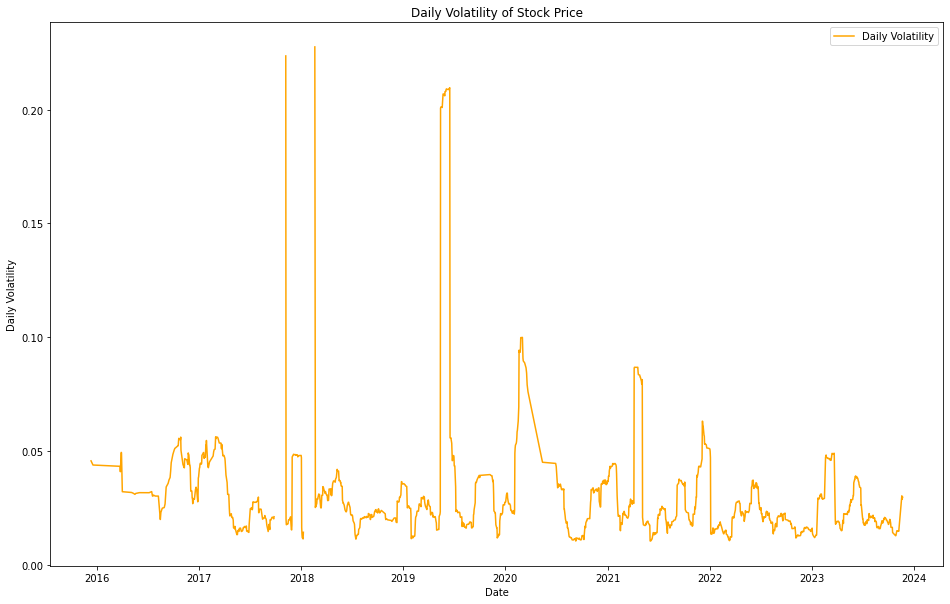

In [73]:
plt.figure(figsize=(16, 10))
plt.plot(df["Date"], daily_volatility, label='Daily Volatility', color='orange')
# plt.plot(df["Date"].head(100), daily_volatility.head(100), label='Daily Volatility', color='orange')
plt.title('Daily Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Daily Volatility')
plt.legend()
plt.show()

In [74]:
df.set_index('Date', inplace=True)
df

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation
Date,,,,,,,,,
2023-12-24,904.0,-1.63,919.5,897.2,901.6,946.0,854929.8,12,-1.63
2023-12-21,919.0,-2.03,922.0,867.3,920.0,1458.0,1303706.4,12,-2.03
2023-12-20,938.0,0.32,950.0,920.0,935.0,1312.0,1230796.5,12,0.32
2023-12-19,935.0,5.29,935.0,900.0,900.0,1866.0,1708422.5,12,5.29
2023-12-17,825.0,-1.94,839.9,825.0,825.0,1031.0,854822.0,12,-1.94
...,...,...,...,...,...,...,...,...,...
2016-03-27,568.0,4.99,568.0,568.0,541.0,30.0,17040.0,3,4.99
2016-03-24,541.0,9.96,541.0,516.0,492.0,440.0,237590.0,3,9.96
2016-03-23,492.0,6.96,492.0,483.0,483.0,190.0,92670.0,3,6.96


In [75]:
# Monthly Volatility
monthly_volatility = df['LTP'].resample('M').std()
# Yesle chai harey month ma vako volatility wa fluctuation lai dekhauxa
monthly_volatility.shape

(97,)

In [76]:
monthly_volatility

Date
2015-12-31    28.991378
2016-01-31          NaN
2016-02-29          NaN
2016-03-31    39.509493
2016-04-30          NaN
                ...    
2023-08-31    24.443925
2023-09-30    12.834244
2023-10-31    21.360493
2023-11-30    23.620195
2023-12-31    48.113539
Freq: M, Name: LTP, Length: 97, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


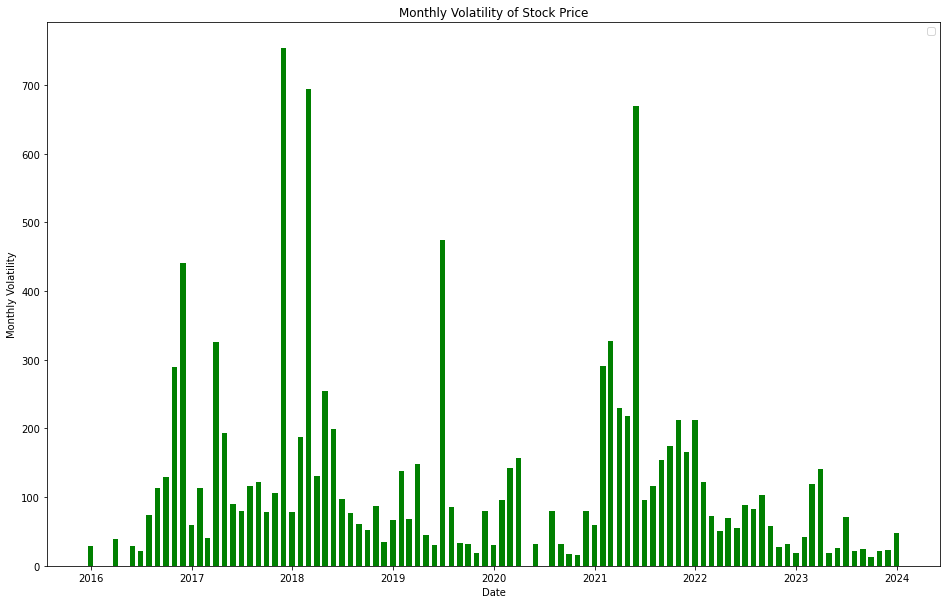

In [77]:
plt.figure(figsize=(16, 10))
plt.bar(monthly_volatility.index, monthly_volatility, color='green', alpha=1, width=20)
plt.title('Monthly Volatility of Stock Price')
plt.xlabel('Date')
plt.ylabel('Monthly Volatility')
plt.legend()
plt.show()


In [78]:
monthly_change = df['%change'].resample('M').mean()


In [79]:
monthly_change

Date
2015-12-31    4.895000
2016-01-31         NaN
2016-02-29         NaN
2016-03-31    5.754000
2016-04-30         NaN
                ...   
2023-08-31   -0.408095
2023-09-30    0.038667
2023-10-31   -0.274706
2023-11-30   -0.433750
2023-12-31    0.216667
Freq: M, Name: %change, Length: 97, dtype: float64

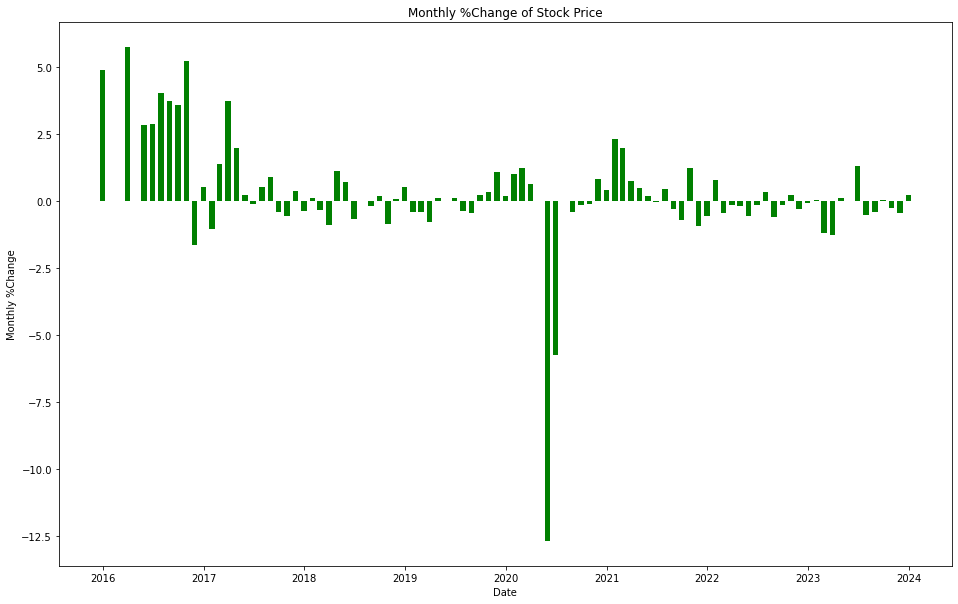

In [80]:
# Plot the monthly %change
plt.figure(figsize=(16, 10))
plt.bar(monthly_change.index, monthly_change, color='green', width=20)
plt.title('Monthly %Change of Stock Price')
plt.xlabel('Date')
plt.ylabel('Monthly %Change')
plt.show()

In [81]:
df_reverse = df[::-1]
# this is done to arrange it according to the old date to new date
df_reverse

,LTP,%change,High,Low,Open,Qty.,Turnover,Month,Fluctuation
Date,,,,,,,,,
2015-12-10,419.0,0.00,419.0,381.0,381.0,590.0,237510.0,12,0.00
2015-12-17,460.0,9.79,460.0,427.0,427.0,100.0,45070.0,12,9.79
2016-03-23,492.0,6.96,492.0,483.0,483.0,190.0,92670.0,3,6.96
2016-03-24,541.0,9.96,541.0,516.0,492.0,440.0,237590.0,3,9.96
2016-03-27,568.0,4.99,568.0,568.0,541.0,30.0,17040.0,3,4.99
...,...,...,...,...,...,...,...,...,...
2023-12-17,825.0,-1.94,839.9,825.0,825.0,1031.0,854822.0,12,-1.94
2023-12-19,935.0,5.29,935.0,900.0,900.0,1866.0,1708422.5,12,5.29
2023-12-20,938.0,0.32,950.0,920.0,935.0,1312.0,1230796.5,12,0.32


Moving Average of 50 days and 200 days

In [82]:
ma_20 = df_reverse['LTP'].rolling(window=20).mean()
ma_50 = df_reverse['LTP'].rolling(window=50).mean()

In [83]:
ma_20, ma_50

(Date
 2015-12-10        NaN
 2015-12-17        NaN
 2016-03-23        NaN
 2016-03-24        NaN
 2016-03-27        NaN
                ...   
 2023-12-17    827.265
 2023-12-19    830.715
 2023-12-20    835.865
 2023-12-21    839.715
 2023-12-24    842.515
 Name: LTP, Length: 1566, dtype: float64,
 Date
 2015-12-10        NaN
 2015-12-17        NaN
 2016-03-23        NaN
 2016-03-24        NaN
 2016-03-27        NaN
                ...   
 2023-12-17    860.782
 2023-12-19    861.224
 2023-12-20    861.922
 2023-12-21    861.942
 2023-12-24    861.322
 Name: LTP, Length: 1566, dtype: float64)

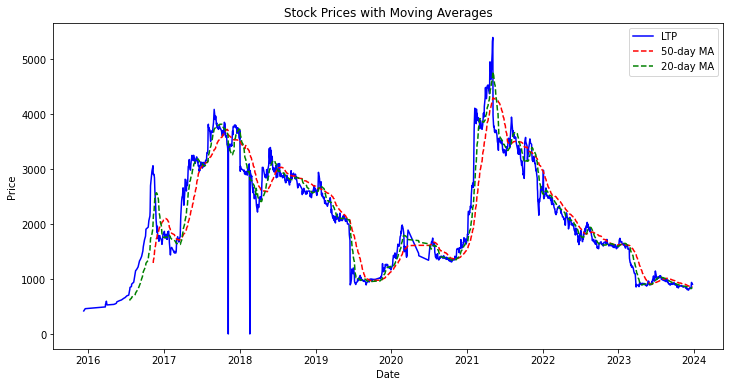

In [84]:
plt.figure(figsize=(12, 6))
plt.plot(df_reverse.index, df_reverse['LTP'], label='LTP', color='blue')
plt.plot(df_reverse.index, ma_50, label='50-day MA', color='red', linestyle='--')
plt.plot(df_reverse.index, ma_20, label='20-day MA', color='green', linestyle='--')
plt.title('Stock Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [85]:
from ta.momentum import RSIIndicator

C:\Users\baral\AppData\Local\Temp\ipykernel_25432\354248743.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reverse['RSI'] = rsi.rsi()


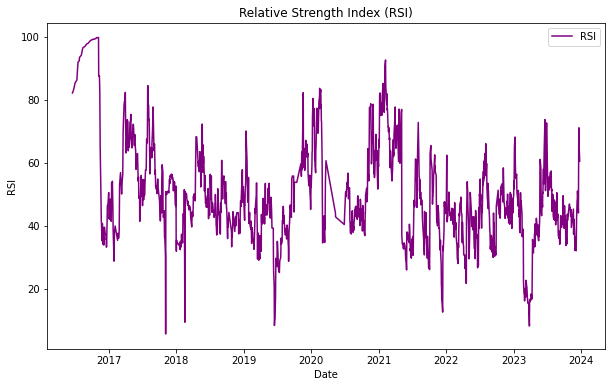

In [86]:
# Calculate RSI
# The RSI oscillates between zero and 100. Traditionally,
# an RSI reading of 70 or above indicates an
# overbought situation, and a reading of 30 or
# below indicates an oversold condition1.
rsi_period = 14
rsi = RSIIndicator(df_reverse['LTP'], window=rsi_period)
df_reverse['RSI'] = rsi.rsi()

plt.figure(figsize=(10, 6))
plt.plot(df_reverse.index, df_reverse['RSI'], label='RSI', color='purple')
plt.title('Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()